In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
advertising=pd.read_csv(r"C:\Users\BEBO\Downloads\Advertising.csv",usecols=[1,2,3,4])

In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Our observations are as follows

NaN values do not present in the data set. Because of the Non-Null Count and number of rows in the dataset match.

There are 3 Input Variables and 1 Output Variable (Sales)

The data type of all the input variables is float64. The data type of out variable (Sales) is float64.

Shows that all the input as well as output variables are continuous (quantitative) data types.

None of the columns contain the Null Values


In [11]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

The dataset does not contain any null values

In [12]:


advertising.describe()



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
(advertising == 0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [14]:
advertising.Sales.value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

# Relationship between Sales and TV

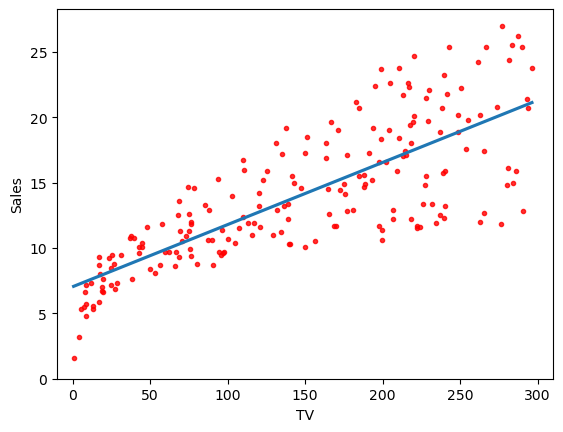

In [15]:
sns.regplot(x=advertising.TV,y=advertising.Sales, order=1, ci=None,
    ...: scatter_kws={'color':'r', 's':9}) 
    ...: plt.xlim(-10,310)
    ...: plt.ylim(bottom=0)
    ...: plt.show() 

# Relationship between Sales and RADIO

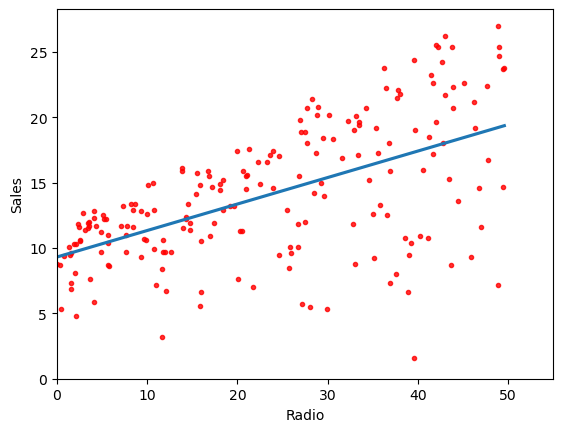

In [16]:
sns.regplot(x=advertising.Radio,y=advertising.Sales, order=1, ci=None,
    ...: scatter_kws={'color':'r', 's':9}) 
    ...: plt.xlim(0,55)
    ...: plt.ylim(bottom=0)
    ...: plt.show() 

# Relationship between SALES and NEWSPAPER

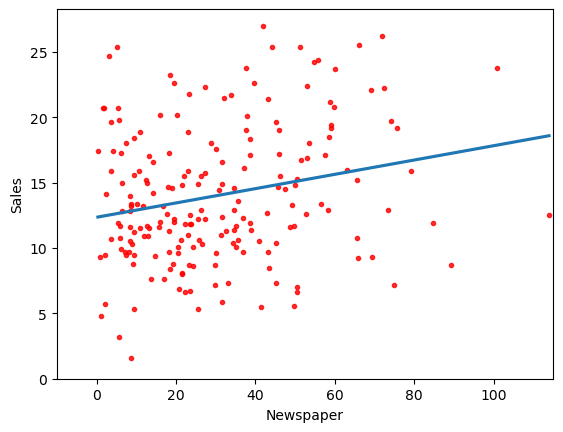

In [17]:
sns.regplot(x=advertising.Newspaper,y=advertising.Sales, order=1, ci=None,scatter_kws={'color':'r', 's':9}) 
plt.xlim(-10,115)
plt.ylim(bottom=0)
plt.show() 

# SCALE THE DATA

In [18]:
from sklearn.preprocessing import scale

In [19]:
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales 

In [20]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [21]:
X.mean()

1.0089706847793422e-14

In [22]:
X.std()

85.63933175679269

# Linear Regression for Scaled Data using sklearn

In [23]:
import sklearn.linear_model as skl_lm

In [24]:
regr = skl_lm.LinearRegression()


In [25]:


regr.fit(X,y)


LinearRegression()

In [26]:
regr.intercept_ 

14.0225

In [27]:
regr.coef_ 

array([0.04753664])

# RSS USING SKLEARN(SCALED DATA)

In [28]:



min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)

In [29]:
min_rss

2102.5305831313512

# Using Sklearn

In [36]:
regr = skl_lm.LinearRegression()

In [37]:
X = advertising.TV.values.reshape(-1,1)

In [38]:
y = advertising.Sales

In [39]:
regr.fit(X,y)

LinearRegression()

In [40]:
regr.intercept_



7.0325935491276965

In [41]:
regr.coef_

array([0.04753664])

# RSS

In [42]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)


In [43]:
min_rss

2102.5305831313512

# MSE


In [44]:
mse = min_rss/len(y)

In [45]:
mse

10.512652915656757

# R(Square) using Sklearn


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
Sales_pred = regr.predict(X)

In [48]:
r2_score(y, Sales_pred)

0.611875050850071

# MSE USING SKLEARN

In [49]:
mean_squared_error(y, Sales_pred)

10.512652915656757

# Regression using Statsmodel

In [50]:
import statsmodels.formula.api as smf

In [51]:
est = smf.ols('Sales ~ TV', advertising).fit()


In [52]:
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.47e-42
Time:                        13:55:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression RSS and MSE

In [53]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64


# RSS

In [54]:
((advertising.Sales - (est.params[0] + est.params[1] * advertising.TV))** 2).sum()

2102.5305831313512

# MSE

In [55]:
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))** 2).sum()/len(advertising.Sales)

10.512652915656757

# Single Linear Regression

In [56]:
est = smf.ols('Sales ~ Radio', advertising).fit()

Linear Regression Sales and Radio

In [57]:
print(est.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


Linear Regression Sales and Newspaper

In [58]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()

In [59]:
print(est.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


# Multiple Linear Regression

In [60]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()

In [65]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        14:03:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation Matrix

In [63]:
advertising.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000
